In [1]:
import numpy as np

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 6.1 매개변수 갱신

## 6.1.2 확률적 경사 하강법(SGD)

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]


In [ ]:
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

## 6.1.4 모멘텀

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## 6.1.5 AdaGrad

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


## 6.1.7 어느 갱신 방법을 이용할 것인가?

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'SGD')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'Momentum')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'AdaGrad')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'Adam')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

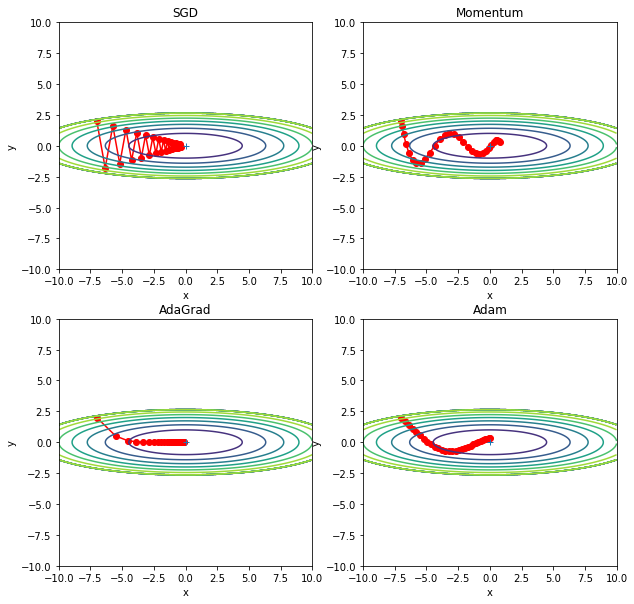

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.rcParams['figure.figsize'] = (10,10)
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.380405805885018
Momentum:2.3368566350310553
AdaGrad:2.0529607513119488
Adam:2.219890566187893
===========iteration:100===========
SGD:1.409670667218519
Momentum:0.3759239625007271
AdaGrad:0.1416637080972356
Adam:0.3358866559141278
===========iteration:200===========
SGD:0.7385900106668122
Momentum:0.18333826080905816
AdaGrad:0.09784896184570563
Adam:0.16101285600127077
===========iteration:300===========
SGD:0.43190206097695455
Momentum:0.14654833675258386
AdaGrad:0.08562819089124085
Adam:0.1474667122998059
===========iteration:400===========
SGD:0.4351126736177843
Momentum:0.20909587003969837
AdaGrad:0.11067310786762105
Adam:0.1633888645578068
===========iteration:500===========
SGD:0.4154295840487318
Momentum:0.22625450871077765
AdaGrad:0.159994433487321
Adam:0.20302367574833324
===========iteration:600===========
SGD:0.40246821159830376
Momentum:0.15627273832659397
AdaGrad:0.05751476422294232
Adam:0.0732470360443861
===========iteration:700===

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'loss')

(0.0, 1.0)

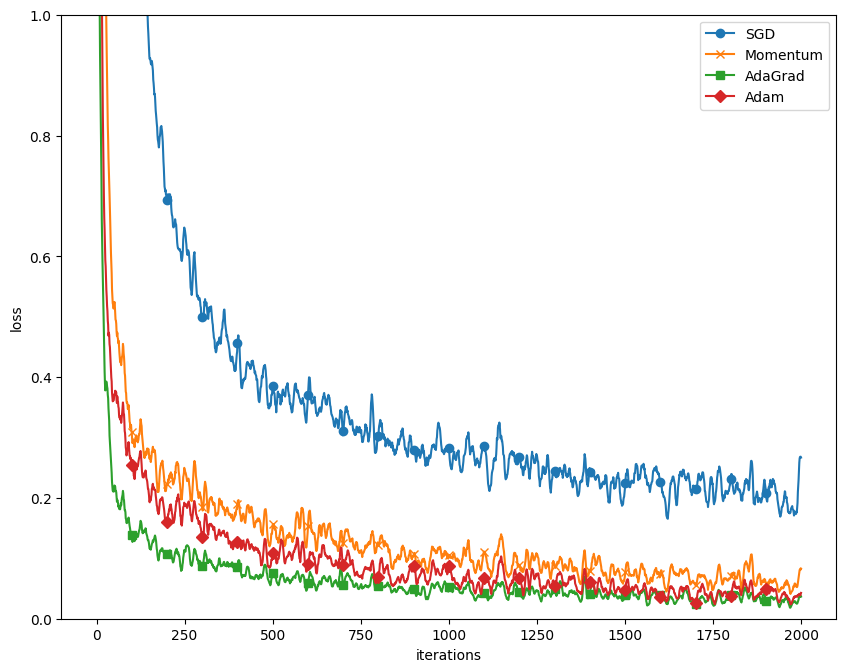

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
plt.figure(figsize=(10,8), dpi=100)
# plt.rcParams['figure.figsize'] = (10,10)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 6.2 가중치의 초깃값

## 6.2.2 은닉층의 활성화값 분포

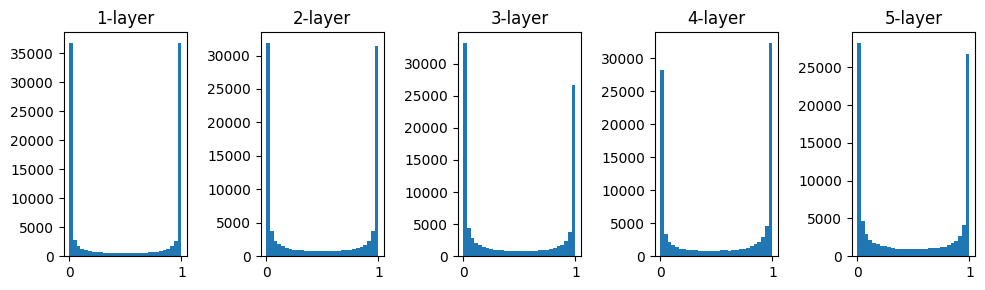

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    # 가중치를 표준편차가 1인 정규분포로 초기화
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
_ = plt.figure(figsize=(10,3), dpi=100)
for i, a in activations.items():
    _ = plt.subplot(1, len(activations), i+1)
    _ = plt.title(str(i+1) + '-layer')
    _ = plt.hist(a.flatten(), 30, range=(0,1))

plt.tight_layout()
plt.show()

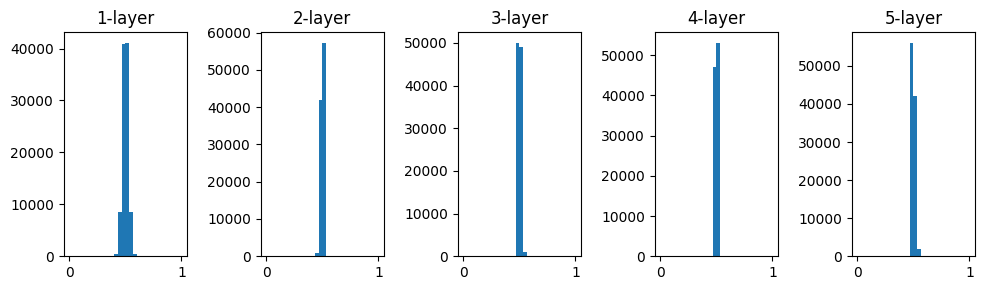

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    # 가중치를 표준편차가 0.01인 정규분포로 초기화
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
_ = plt.figure(figsize=(10,3), dpi=100)
for i, a in activations.items():
    _ = plt.subplot(1, len(activations), i+1)
    _ = plt.title(str(i+1) + '-layer')
    _ = plt.hist(a.flatten(), 30, range=(0,1))

plt.tight_layout()
plt.show()

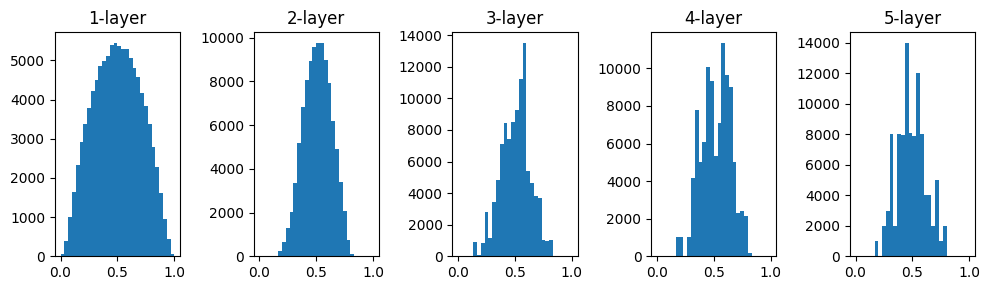

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    # 가중치를 표준편차가 1/sqrt(n)인 정규분포로 초기화
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
_ = plt.figure(figsize=(10,3), dpi=100)
for i, a in activations.items():
    _ = plt.subplot(1, len(activations), i+1)
    _ = plt.title(str(i+1) + '-layer')
    _ = plt.hist(a.flatten(), 30, range=(0,1))

plt.tight_layout()
plt.show()

## 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3024407458296494
Xavier:2.3217989984171963
He:2.3347523614749344
===========iteration:100===========
std=0.01:2.3025073830704352
Xavier:2.237504422257487
He:1.4560233733037675
===========iteration:200===========
std=0.01:2.301833821981303
Xavier:2.054172970775171
He:0.7753622886754794
===========iteration:300===========
std=0.01:2.301916200457196
Xavier:1.7837654424818923
He:0.5146281753047386
===========iteration:400===========
std=0.01:2.299817648748783
Xavier:1.177525413874399
He:0.4747008356817711
===========iteration:500===========
std=0.01:2.301737805947276
Xavier:0.818823173118364
He:0.3179354567193844
===========iteration:600===========
std=0.01:2.299007983579953
Xavier:0.6341212182037214
He:0.283009407177472
===========iteration:700===========
std=0.01:2.300746444680506
Xavier:0.6267366288712019
He:0.28851755930794043
===========iteration:800===========
std=0.01:2.298893564258533
Xavier:0.5062242672938572
He:0.2782721038713244
=====

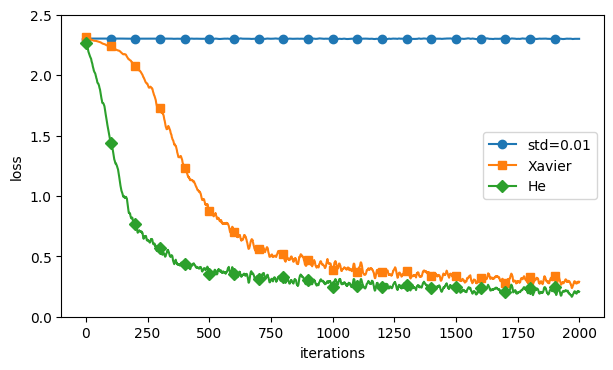

In [4]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정
weight_init_types = {'std=0.01':0.01, 'Xavier':'sigmoid', 'He':'relu'}
optimizer = SGD(lr=0.01)
networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
_ = plt.figure(figsize=(7,4), dpi=100)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 6.3 배치 정규화

## 6.3.2 배치 정규화의 효과

============== 1/16 ==============
epoch:0 | 0.116 - 0.079
epoch:1 | 0.097 - 0.097
epoch:2 | 0.097 - 0.123


/Users/lsh/Documents/github/DeepLearning/ch06/../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:3 | 0.097 - 0.128
epoch:4 | 0.097 - 0.147
epoch:5 | 0.097 - 0.16
epoch:6 | 0.097 - 0.182
epoch:7 | 0.097 - 0.203
epoch:8 | 0.097 - 0.215
epoch:9 | 0.097 - 0.228
epoch:10 | 0.097 - 0.254
epoch:11 | 0.097 - 0.26
epoch:12 | 0.097 - 0.28
epoch:13 | 0.097 - 0.298
epoch:14 | 0.097 - 0.31
epoch:15 | 0.097 - 0.325
epoch:16 | 0.097 - 0.328
epoch:17 | 0.097 - 0.355


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.097 - 0.377
epoch:19 | 0.097 - 0.394
============== 2/16 ==============
epoch:0 | 0.117 - 0.076


/Users/lsh/Documents/github/DeepLearning/ch06/../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/lsh/Documents/github/DeepLearning/ch06/../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.121
epoch:2 | 0.097 - 0.149
epoch:3 | 0.097 - 0.174
epoch:4 | 0.097 - 0.2
epoch:5 | 0.097 - 0.226
epoch:6 | 0.097 - 0.244
epoch:7 | 0.097 - 0.257
epoch:8 | 0.097 - 0.28
epoch:9 | 0.097 - 0.294
epoch:10 | 0.097 - 0.32
epoch:11 | 0.097 - 0.342
epoch:12 | 0.097 - 0.362
epoch:13 | 0.097 - 0.38
epoch:14 | 0.097 - 0.398
epoch:15 | 0.097 - 0.423
epoch:16 | 0.097 - 0.433
epoch:17 | 0.097 - 0.449
epoch:18 | 0.097 - 0.465


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.486
============== 3/16 ==============
epoch:0 | 0.097 - 0.057
epoch:1 | 0.278 - 0.106
epoch:2 | 0.471 - 0.125
epoch:3 | 0.503 - 0.155
epoch:4 | 0.583 - 0.194
epoch:5 | 0.638 - 0.247
epoch:6 | 0.683 - 0.285
epoch:7 | 0.72 - 0.325
epoch:8 | 0.769 - 0.364
epoch:9 | 0.794 - 0.404
epoch:10 | 0.819 - 0.434
epoch:11 | 0.833 - 0.462
epoch:12 | 0.86 - 0.502
epoch:13 | 0.869 - 0.527
epoch:14 | 0.878 - 0.56
epoch:15 | 0.901 - 0.581
epoch:16 | 0.916 - 0.605


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:17 | 0.922 - 0.619
epoch:18 | 0.932 - 0.641
epoch:19 | 0.94 - 0.655
============== 4/16 ==============
epoch:0 | 0.092 - 0.088
epoch:1 | 0.2 - 0.159
epoch:2 | 0.344 - 0.205
epoch:3 | 0.438 - 0.284
epoch:4 | 0.514 - 0.347
epoch:5 | 0.572 - 0.395
epoch:6 | 0.629 - 0.46
epoch:7 | 0.677 - 0.513
epoch:8 | 0.709 - 0.555
epoch:9 | 0.72 - 0.601
epoch:10 | 0.754 - 0.626
epoch:11 | 0.771 - 0.657
epoch:12 | 0.788 - 0.671
epoch:13 | 0.802 - 0.692
epoch:14 | 0.812 - 0.711
epoch:15 | 0.827 - 0.735
epoch:16 | 0.834 - 0.749
epoch:17 | 0.839 - 0.754


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.853 - 0.775
epoch:19 | 0.868 - 0.789
============== 5/16 ==============
epoch:0 | 0.086 - 0.09
epoch:1 | 0.095 - 0.146
epoch:2 | 0.113 - 0.27
epoch:3 | 0.138 - 0.415
epoch:4 | 0.155 - 0.472
epoch:5 | 0.165 - 0.548
epoch:6 | 0.179 - 0.599
epoch:7 | 0.2 - 0.638
epoch:8 | 0.216 - 0.672
epoch:9 | 0.225 - 0.7
epoch:10 | 0.233 - 0.725
epoch:11 | 0.243 - 0.743
epoch:12 | 0.258 - 0.763
epoch:13 | 0.265 - 0.782
epoch:14 | 0.277 - 0.794
epoch:15 | 0.278 - 0.809
epoch:16 | 0.29 - 0.827
epoch:17 | 0.303 - 0.835
epoch:18 | 0.302 - 0.848


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.304 - 0.855
============== 6/16 ==============
epoch:0 | 0.106 - 0.11
epoch:1 | 0.134 - 0.2
epoch:2 | 0.105 - 0.42
epoch:3 | 0.117 - 0.57
epoch:4 | 0.117 - 0.656
epoch:5 | 0.117 - 0.71
epoch:6 | 0.117 - 0.745
epoch:7 | 0.117 - 0.777
epoch:8 | 0.117 - 0.807
epoch:9 | 0.117 - 0.828
epoch:10 | 0.117 - 0.857
epoch:11 | 0.117 - 0.873
epoch:12 | 0.117 - 0.879
epoch:13 | 0.117 - 0.898
epoch:14 | 0.117 - 0.904
epoch:15 | 0.117 - 0.921
epoch:16 | 0.117 - 0.925


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:17 | 0.117 - 0.932
epoch:18 | 0.117 - 0.935
epoch:19 | 0.117 - 0.942
============== 7/16 ==============
epoch:0 | 0.116 - 0.063
epoch:1 | 0.117 - 0.216
epoch:2 | 0.116 - 0.6
epoch:3 | 0.116 - 0.725
epoch:4 | 0.116 - 0.795
epoch:5 | 0.116 - 0.831
epoch:6 | 0.116 - 0.853
epoch:7 | 0.116 - 0.884
epoch:8 | 0.116 - 0.91
epoch:9 | 0.117 - 0.922
epoch:10 | 0.117 - 0.939
epoch:11 | 0.117 - 0.952
epoch:12 | 0.117 - 0.963
epoch:13 | 0.117 - 0.974
epoch:14 | 0.117 - 0.976
epoch:15 | 0.117 - 0.981
epoch:16 | 0.117 - 0.984
epoch:17 | 0.117 - 0.989


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.989
epoch:19 | 0.117 - 0.993
============== 8/16 ==============
epoch:0 | 0.105 - 0.111
epoch:1 | 0.117 - 0.256
epoch:2 | 0.116 - 0.691
epoch:3 | 0.117 - 0.75
epoch:4 | 0.117 - 0.81
epoch:5 | 0.117 - 0.826
epoch:6 | 0.117 - 0.87
epoch:7 | 0.117 - 0.898
epoch:8 | 0.117 - 0.928
epoch:9 | 0.117 - 0.953
epoch:10 | 0.117 - 0.97
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.986
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.117 - 0.126
epoch:1 | 0.117 - 0.517
epoch:2 | 0.117 - 0.778
epoch:3 | 0.117 - 0.857
epoch:4 | 0.117 - 0.9
epoch:5 | 0.116 - 0.941
epoch:6 | 0.116 - 0.932
epoch:7 | 0.116 - 0.981
epoch:8 | 0.116 - 0.984
epoch:9 | 0.116 - 0.99
epoch:10 | 0.116 - 0.995
epoch:11 | 0.116 - 0.996
epoch:12 | 0.116 - 0.997
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0
epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.097 - 0.094
epoch:1 | 0.099 - 0.635
epoch:2 | 0.099 - 0.666
epoch:3 | 0.117 - 0.689
epoch:4 | 0.117 - 0.71
epoch:5 | 0.117 - 0.773
epoch:6 | 0.117 - 0.836
epoch:7 | 0.117 - 0.863
epoch:8 | 0.117 - 0.888
epoch:9 | 0.117 - 0.908
epoch:10 | 0.116 - 0.897
epoch:11 | 0.116 - 0.905
epoch:12 | 0.116 - 0.908
epoch:13 | 0.116 - 0.903
epoch:14 | 0.116 - 0.911
epoch:15 | 0.116 - 0.911
epoch:16 | 0.116 - 0.911
epoch:17 | 0.116 - 0.911


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.911
epoch:19 | 0.116 - 0.911
============== 11/16 ==============
epoch:0 | 0.116 - 0.131
epoch:1 | 0.116 - 0.599
epoch:2 | 0.116 - 0.701
epoch:3 | 0.116 - 0.691
epoch:4 | 0.116 - 0.767
epoch:5 | 0.116 - 0.784
epoch:6 | 0.116 - 0.612
epoch:7 | 0.117 - 0.776
epoch:8 | 0.116 - 0.851
epoch:9 | 0.117 - 0.971
epoch:10 | 0.116 - 0.969
epoch:11 | 0.117 - 0.981
epoch:12 | 0.117 - 0.987
epoch:13 | 0.116 - 0.992
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.993
epoch:16 | 0.116 - 0.949
epoch:17 | 0.116 - 0.977
epoch:18 | 0.116 - 0.981


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.974
============== 12/16 ==============
epoch:0 | 0.116 - 0.217
epoch:1 | 0.117 - 0.443
epoch:2 | 0.116 - 0.61
epoch:3 | 0.117 - 0.647
epoch:4 | 0.117 - 0.73
epoch:5 | 0.117 - 0.76
epoch:6 | 0.116 - 0.649
epoch:7 | 0.117 - 0.782
epoch:8 | 0.116 - 0.784
epoch:9 | 0.116 - 0.791
epoch:10 | 0.116 - 0.869
epoch:11 | 0.116 - 0.858
epoch:12 | 0.116 - 0.875
epoch:13 | 0.116 - 0.885
epoch:14 | 0.116 - 0.89
epoch:15 | 0.116 - 0.892
epoch:16 | 0.116 - 0.877


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:17 | 0.116 - 0.893
epoch:18 | 0.116 - 0.893
epoch:19 | 0.116 - 0.877
============== 13/16 ==============
epoch:0 | 0.105 - 0.142
epoch:1 | 0.105 - 0.429
epoch:2 | 0.1 - 0.579
epoch:3 | 0.1 - 0.601
epoch:4 | 0.1 - 0.601
epoch:5 | 0.116 - 0.569
epoch:6 | 0.116 - 0.605
epoch:7 | 0.116 - 0.62
epoch:8 | 0.117 - 0.617
epoch:9 | 0.117 - 0.625
epoch:10 | 0.117 - 0.615
epoch:11 | 0.116 - 0.619
epoch:12 | 0.117 - 0.618
epoch:13 | 0.116 - 0.617
epoch:14 | 0.117 - 0.618
epoch:15 | 0.117 - 0.618
epoch:16 | 0.117 - 0.619
epoch:17 | 0.117 - 0.703


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.707
epoch:19 | 0.117 - 0.711
============== 14/16 ==============
epoch:0 | 0.116 - 0.125
epoch:1 | 0.117 - 0.353
epoch:2 | 0.117 - 0.393
epoch:3 | 0.116 - 0.493
epoch:4 | 0.116 - 0.496
epoch:5 | 0.116 - 0.512
epoch:6 | 0.116 - 0.503
epoch:7 | 0.116 - 0.509
epoch:8 | 0.116 - 0.408
epoch:9 | 0.116 - 0.518
epoch:10 | 0.116 - 0.527
epoch:11 | 0.117 - 0.525
epoch:12 | 0.116 - 0.529
epoch:13 | 0.116 - 0.53
epoch:14 | 0.116 - 0.527
epoch:15 | 0.116 - 0.529
epoch:16 | 0.116 - 0.53
epoch:17 | 0.116 - 0.529
epoch:18 | 0.116 - 0.527


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.529
============== 15/16 ==============
epoch:0 | 0.105 - 0.156
epoch:1 | 0.116 - 0.387
epoch:2 | 0.116 - 0.485
epoch:3 | 0.117 - 0.492
epoch:4 | 0.117 - 0.548
epoch:5 | 0.117 - 0.503
epoch:6 | 0.117 - 0.569
epoch:7 | 0.117 - 0.591
epoch:8 | 0.117 - 0.585
epoch:9 | 0.117 - 0.555
epoch:10 | 0.117 - 0.593
epoch:11 | 0.117 - 0.535
epoch:12 | 0.117 - 0.597
epoch:13 | 0.117 - 0.609
epoch:14 | 0.117 - 0.578
epoch:15 | 0.117 - 0.611
epoch:16 | 0.117 - 0.611


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:17 | 0.117 - 0.613
epoch:18 | 0.117 - 0.603
epoch:19 | 0.117 - 0.608
============== 16/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.117 - 0.304
epoch:2 | 0.116 - 0.372
epoch:3 | 0.116 - 0.403
epoch:4 | 0.117 - 0.411
epoch:5 | 0.116 - 0.408
epoch:6 | 0.116 - 0.496
epoch:7 | 0.117 - 0.359
epoch:8 | 0.117 - 0.502
epoch:9 | 0.117 - 0.509
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.517
epoch:12 | 0.117 - 0.52
epoch:13 | 0.117 - 0.523
epoch:14 | 0.117 - 0.522
epoch:15 | 0.117 - 0.514
epoch:16 | 0.117 - 0.516
epoch:17 | 0.117 - 0.523
epoch:18 | 0.117 - 0.52
epoch:19 | 0.117 - 0.522


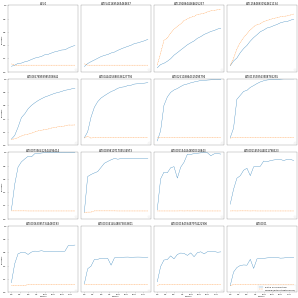

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
_ = plt.figure(figsize=(20,20), dpi=15)
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# 6.4 바른 학습을 위해

## 6.4.1 오버피팅

epoch:0, train acc:0.08333333333333333, test acc:0.1012
epoch:1, train acc:0.10333333333333333, test acc:0.115
epoch:2, train acc:0.13333333333333333, test acc:0.1342
epoch:3, train acc:0.18, test acc:0.1548
epoch:4, train acc:0.22666666666666666, test acc:0.1815
epoch:5, train acc:0.29, test acc:0.2142
epoch:6, train acc:0.31, test acc:0.2392
epoch:7, train acc:0.33666666666666667, test acc:0.2679
epoch:8, train acc:0.35333333333333333, test acc:0.2888
epoch:9, train acc:0.36666666666666664, test acc:0.3065
epoch:10, train acc:0.39, test acc:0.3155
epoch:11, train acc:0.3933333333333333, test acc:0.323
epoch:12, train acc:0.43, test acc:0.3549
epoch:13, train acc:0.44666666666666666, test acc:0.3637
epoch:14, train acc:0.4866666666666667, test acc:0.3891
epoch:15, train acc:0.52, test acc:0.4154
epoch:16, train acc:0.53, test acc:0.4226
epoch:17, train acc:0.5266666666666666, test acc:0.4265
epoch:18, train acc:0.55, test acc:0.4412
epoch:19, train acc:0.5733333333333334, test acc:0.4

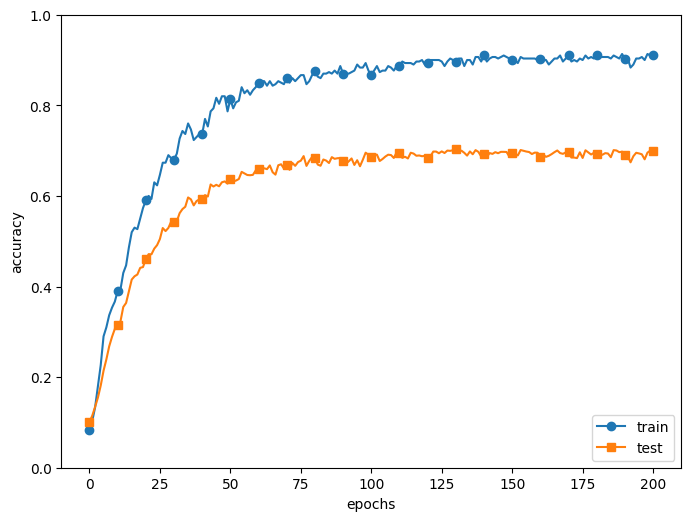

In [10]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

# 에폭마다 모든 훈련 데이터와 모든 시험 데이터 각각에서 정확도를 산출함
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.figure(figsize=(8,6),dpi=100)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 6.4.2 가중치 감소

In [ ]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
